# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,invercargill,-46.4000,168.3500,16.12,71,45,8.05,NZ,1732589381
1,1,ilulissat,69.2167,-51.1000,-3.99,68,75,5.66,GL,1732589578
2,2,margaret river,-33.9500,115.0667,16.98,47,8,7.09,AU,1732589448
3,3,susuman,62.7833,148.1667,-32.96,95,9,0.39,RU,1732589579
4,4,banikoara,11.2985,2.4386,19.65,25,0,2.31,BJ,1732589579


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

/Applications/anaconda3/envs/dev/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Applications/anaconda3/envs/dev/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Applications/anaconda3/envs/dev/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Applications/anaconda3/envs/dev/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', Download

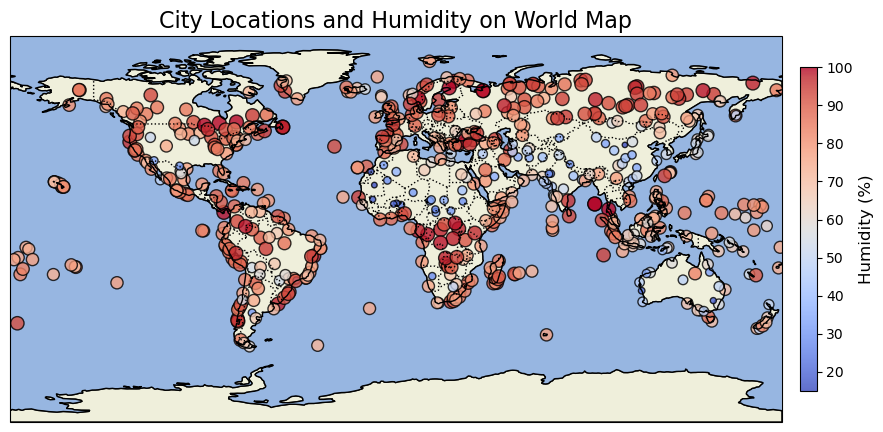

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ensure the necessary columns exist
if "Lat" in city_data_df.columns and "Lng" in city_data_df.columns and "Humidity" in city_data_df.columns:
    if not city_data_df.empty:
        # Clean the data to ensure valid numeric values
        city_data_df = city_data_df.dropna(subset=["Lat", "Lng", "Humidity"])
        city_data_df = city_data_df[
            (city_data_df["Lat"] >= -90) & (city_data_df["Lat"] <= 90) &
            (city_data_df["Lng"] >= -180) & (city_data_df["Lng"] <= 180) &
            (city_data_df["Humidity"] >= 0) & (city_data_df["Humidity"] <= 100)
        ]

        if not city_data_df.empty:
            # Create a map plot
            plt.figure(figsize=(12, 6))
            ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection for geographic data
            ax.set_global()  # Set the map extent to global
            ax.add_feature(cfeature.LAND, edgecolor="black")  # Add land
            ax.add_feature(cfeature.OCEAN)  # Add ocean
            ax.add_feature(cfeature.COASTLINE)  # Add coastline
            ax.add_feature(cfeature.BORDERS, linestyle=":")  # Add country borders

            # Scatter plot with point size based on humidity
            scatter = plt.scatter(
                city_data_df["Lng"],  # Longitude
                city_data_df["Lat"],  # Latitude
                c=city_data_df["Humidity"],  # Color based on humidity
                s=city_data_df["Humidity"],  # Size based on humidity
                cmap="coolwarm",  # Colormap for humidity
                alpha=0.8, edgecolor="black",
                transform=ccrs.PlateCarree()  # Transform coordinates to match the map projection
            )

            # Add color bar for humidity
            cbar = plt.colorbar(scatter, orientation="vertical", pad=0.02, shrink=0.7)
            cbar.set_label("Humidity (%)", fontsize=12)

            # Add title
            plt.title("City Locations and Humidity on World Map", fontsize=16)

            # Save and show the plot
            plt.savefig("output_data/city_humidity_map.png", dpi=300)
            plt.show()
        else:
            print("Error: No valid data after cleaning.")
    else:
        print("Error: The DataFrame is empty.")
else:
    print("Error: Ensure the DataFrame has 'Lat', 'Lng', and 'Humidity' columns.")


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [7]:
# Narrow down cities that fit the criteria and drop any results with null values
# Criteria: Humidity between 50 and 100, Latitude between -90 and 90
filtered_cities_df = city_data_df[
    (city_data_df["Humidity"] >= 50) & 
    (city_data_df["Humidity"] <= 100) &
    (city_data_df["Lat"] >= -90) & 
    (city_data_df["Lat"] <= 90)
]

# Drop any rows with null values
filtered_cities_df = filtered_cities_df.dropna()

# Display sample data
print(filtered_cities_df.head())


   City_ID          City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        0  invercargill -46.4000  168.3500     16.12        71          45   
1        1     ilulissat  69.2167  -51.1000     -3.99        68          75   
3        3       susuman  62.7833  148.1667    -32.96        95           9   
5        5         utrik  11.2278  169.8474     28.36        80          42   
6        6       qinzhou  21.9500  108.6167     15.97        52         100   

   Wind Speed Country        Date  
0        8.05      NZ  1732589381  
1        5.66      GL  1732589578  
3        0.39      RU  1732589579  
5        9.02      MH  1732589579  
6        6.23      CN  1732589579  


### Step 3: Create a new DataFrame called `hotel_df`.

In [8]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
print(hotel_df.head())


             City Country      Lat       Lng  Humidity Hotel Name
0    invercargill      NZ -46.4000  168.3500        71           
1       ilulissat      GL  69.2167  -51.1000        68           
2  margaret river      AU -33.9500  115.0667        47           
3         susuman      RU  62.7833  148.1667        95           
4       banikoara      BJ  11.2985    2.4386        25           


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [12]:
# Set parameters to search for a hotel
radius = 10000  # Radius in meters
params = {
    "categories": "accommodation.hotel",
    "apiKey": geoapify_key,
    "limit": 1
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = name_address.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
invercargill - nearest hotel: The Grand
ilulissat - nearest hotel: Best Western Plus Hotel Ilulissat
margaret river - nearest hotel: Margaret River Hotel
susuman - nearest hotel: No hotel found
banikoara - nearest hotel: No hotel found
utrik - nearest hotel: No hotel found
qinzhou - nearest hotel: 天骄国际酒店
pingnan - nearest hotel: No hotel found
adamstown - nearest hotel: No hotel found
saint-pierre - nearest hotel: Tropic Hotel
kirakira - nearest hotel: No hotel found
carnarvon - nearest hotel: No hotel found
waitangi - nearest hotel: Hotel Chathams
bilibino - nearest hotel: No hotel found
west island - nearest hotel: Cocos Village Bungalows
enewetak - nearest hotel: No hotel found
fortuna - nearest hotel: Comfort Inn & Suites Redwood Country
nova vicosa - nearest hotel: Pousada Pontal da Barra
puerto baquerizo moreno - nearest hotel: Dory's House
saipan - nearest hotel: Chalan Kanoa Beach Hotel
port-aux-francais - nearest hotel: Keravel
gizo - nearest hotel: Gizo 

,City,Country,Lat,Lng,Humidity,Hotel Name
0,invercargill,NZ,-46.4000,168.3500,71,The Grand
1,ilulissat,GL,69.2167,-51.1000,68,Best Western Plus Hotel Ilulissat
2,margaret river,AU,-33.9500,115.0667,47,Margaret River Hotel
3,susuman,RU,62.7833,148.1667,95,No hotel found
4,banikoara,BJ,11.2985,2.4386,25,No hotel found
...,...,...,...,...,...,...
577,soe,ID,-9.8607,124.2840,42,DENA
578,pueblo nuevo,MX,23.3833,-105.3833,85,No hotel found
579,lianzhou,CN,24.7811,112.3825,52,No hotel found
580,bamboo flat,IN,11.7000,92.7167,100,Hotel Megapode Nest


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [13]:
%%capture --no-display

# Configure the map plot
hotel_plot = hotel_df.hvplot.points(
    x="Lng",
    y="Lat",
    c="Humidity",
    cmap="coolwarm",
    hover_cols=["City", "Country", "Hotel Name"],
    title="Hotel Locations and Humidity on World Map",
    height=500,
    width=800
)

# YOUR CODE HERE

# Display the map
hotel_plot

# YOUR CODE HERE

:Points   [Lng,Lat]   (Humidity,City,Country,Hotel Name)